In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# https://qiita.com/y_itoh/items/227cb33317ceb09199c2

# サンプルデータを読み込み

In [21]:
url = 'https://raw.githubusercontent.com/yumi-ito/sample_data/master/subject_scores.csv'
df = pd.read_csv(url)
df.head()

,国語,英語,数学,物理,化学,生物,地学,世界史,日本史,経済,地理,倫理
0,49,49,54,54,60,48,56,56,62,52,55,41
1,57,60,48,51,64,60,61,64,67,55,58,54
2,65,68,50,51,54,44,55,59,66,53,61,52
3,55,57,49,51,61,55,58,61,66,53,57,50
4,43,41,45,46,46,33,45,45,56,43,45,31


# 基本的な情報を見る

In [13]:
df.describe()

,国語,英語,数学,物理,化学,生物,地学,世界史,日本史,経済,地理,倫理
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,57.578000,59.628000,52.577000,53.584000,60.600000,51.601000,58.561000,60.630000,65.574000,54.576000,59.640000,49.588000
std,8.322931,10.072391,6.192448,5.264661,8.366122,10.677069,7.037031,7.457259,4.315454,5.795845,6.775124,9.054404
min,30.000000,26.000000,33.000000,36.000000,34.000000,16.000000,36.000000,37.000000,52.000000,35.000000,37.000000,23.000000
25%,52.000000,53.000000,48.750000,50.000000,55.000000,44.000000,54.000000,56.000000,63.000000,51.000000,55.000000,44.000000
50%,58.000000,60.000000,52.000000,54.000000,61.000000,52.000000,59.000000,61.000000,66.000000,55.000000,60.000000,49.000000
75%,63.000000,66.000000,57.000000,57.000000,66.000000,59.000000,63.000000,66.000000,69.000000,59.000000,64.000000,56.000000
max,86.000000,95.000000,72.000000,69.000000,82.000000,82.000000,77.000000,85.000000,81.000000,71.000000,79.000000,84.000000


/Users/shojiro/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


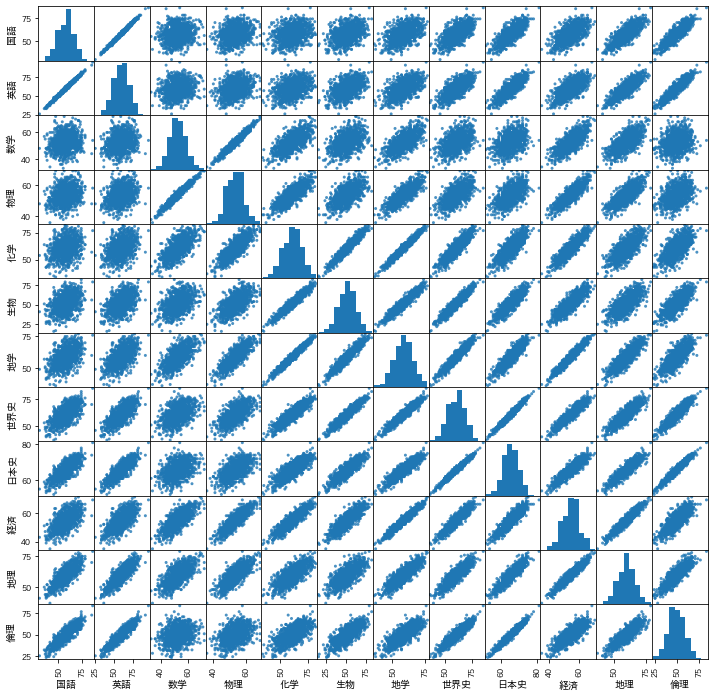

In [15]:
'''
# correlation plot
plt.figure(figsize=(40, 40))
sns.heatmap(data=df.corr())
'''
# !pip install japanize-matplotlib
import japanize_matplotlib
pd.plotting.scatter_matrix(df, figsize=(12, 12), alpha=0.8)
plt.show()

# データの標準化

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)

z = sc.transform(df)

In [27]:
z.shape

(1000, 12)

# モデルの作成

In [28]:
from sklearn.decomposition import FactorAnalysis as FA

# 因子数を指定
n_components = 3
fa = FA(n_components, max_iter=5000)
fitted = fa.fit_transform(z)

In [38]:
# 各人のテスト得点が、因子得点変換された
fitted

array([[-0.6705818 , -0.90529972,  0.23116072],
       [ 0.27219313, -0.17166869, -1.46040494],
       [-0.05808444,  1.40178149,  0.43144979],
       ...,
       [ 0.97637537,  1.16922934, -0.40674828],
       [ 1.49290395,  3.41275196, -0.88995801],
       [-1.21789602, -2.79718726,  0.02309828]])

In [40]:
# 因子負荷量を取得
# fa.components_.T
Factor_loading_matrix = fa.components_.T

pd.DataFrame(Factor_loading_matrix, 
             columns=["第一因子", "第二因子", "第三因子"], 
            index=[df.columns])

,第一因子,第二因子,第三因子
国語,0.742494,0.660333,0.106680
英語,0.809237,0.582365,0.071908
数学,0.555028,-0.485400,0.673965
物理,0.705315,-0.479077,0.519653
化学,0.854549,-0.512713,-0.075076
生物,0.878975,-0.358658,-0.312993
地学,0.940102,-0.338218,0.002551
世界史,0.982309,-0.088080,-0.160289
日本史,0.985873,0.082731,-0.129955
経済,0.961655,-0.178404,0.201633


第一因子は、すべての変数に対してプラスである
従って、基礎学力？

第二因子は、文系、、？言語能力？

第三因子は、数学、物理が高い、理系？